In [213]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split 
from math import sqrt
import matplotlib.pyplot as plt

In [214]:
#Importing dataset
df1=pd.read_csv('winequality-red.csv',sep=';')
df2=pd.read_csv('winequality-white.csv',sep=';')

In [215]:
df=df1.append(df2)


In [216]:
df.shape
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [313]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values
X=(X-X.mean())/X.std()
y=(y-y.mean())/y.std()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
theta= np.zeros((12,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

#Costfunction

In [240]:
def costfunction(theta,x1,y1):
    m=len(y1)
    #print(x1.shape,theta.shape)
    predictions=x1.dot(theta)
    #print(predictions.shape)
    #print(y1.shape)
    cost=(1/2*m)*(np.sum(np.square(predictions-y1)))
    return cost

# Gradient descent

In [257]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        #print(X.shape)
        #print(B.shape)
        h = np.dot(X,B)
        #print(h.shape)
        
        Y=Y.reshape((len(X),1))
        #print(Y.shape)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        
        # Gradient Calculation
        gradient = ((X.T).dot(loss)) / m
        #print(gradient.shape)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        #print(B)
        # New Cost Value
        cost = costfunction(B,X, Y)
        #print(cost)
        cost_history[iteration] = cost
        
    return B, cost_history

Updating Theta

In [361]:
B, cost_history= gradient_descent(X_train, y_train, theta, 0.1, 1000000)

#B=np.random.randn(12,1)
#alpha=0.01
#x_b=np.c_[np.ones((len(X_train),1)),X_train]
#newB, cost_history = gradient_descent(x_b, y_train, B, alpha, 1000)

In [362]:
#cost_history

Text(0.5, 1.0, 'Error vs. Training Epoch')

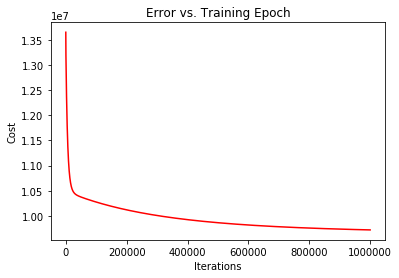

In [363]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000000), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [365]:
X_test.shape

(1300, 12)

In [366]:
B.shape

(12, 1)

In [316]:
X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)

X_test.shape

(1300, 12)

In [317]:
B.shape

(12, 1)

In [318]:
y_pred=np.dot(X_test,B)
y_pred

array([[-0.1590036 ],
       [-0.27606049],
       [-0.18661284],
       ...,
       [-0.55913276],
       [-0.57205204],
       [ 0.23637215]])

In [319]:
y_test

array([-0.93722961, -0.93722961,  0.20799905, ..., -0.93722961,
       -0.93722961,  1.35322771])

# Defining accuracy metrics

In [320]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [367]:
rmse_metric(y_test,y_pred)

0.8385689598168785

In [368]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.26295010745546066

In [369]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.703197900368362